DECISION TREE
Training time:  4.747862339019775
Testing time:  0.008001089096069336
Train score is: 99.99%
Test score is: 99.19%
Model Accuracy: 99.19%
SUPPORT VECTOR MACHINE
Training time:  45.918413400650024
Testing time:  12.124455451965332
Train score is: 96.63%
Test score is: 96.40%
Model Accuracy: 96.40%
LOGISTIC REGRESSION
Training time:  18.870761394500732
Testing time:  0.006100893020629883
Train score is: 95.40%
Test score is: 95.21%
Model Accuracy: 95.21%
GAUSSION NAIVE BAYES
Training time:  0.048006296157836914
Testing time:  0.09399747848510742
Train score is: 60.31%
Test score is: 60.06%
Model Accuracy: 60.06%
RANDOM FOREST
Training time:  57.91543221473694
Testing time:  0.5556497573852539
Train score is: 99.99%
Test score is: 99.46%
Model Accuracy: 99.46%


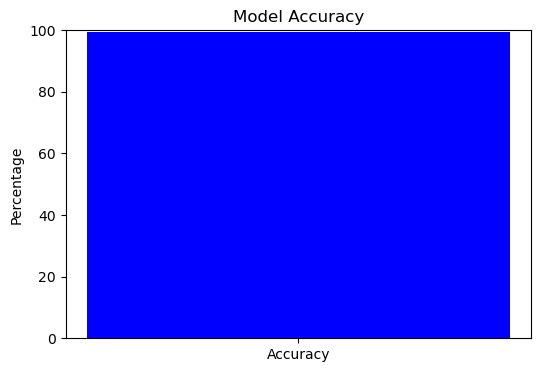

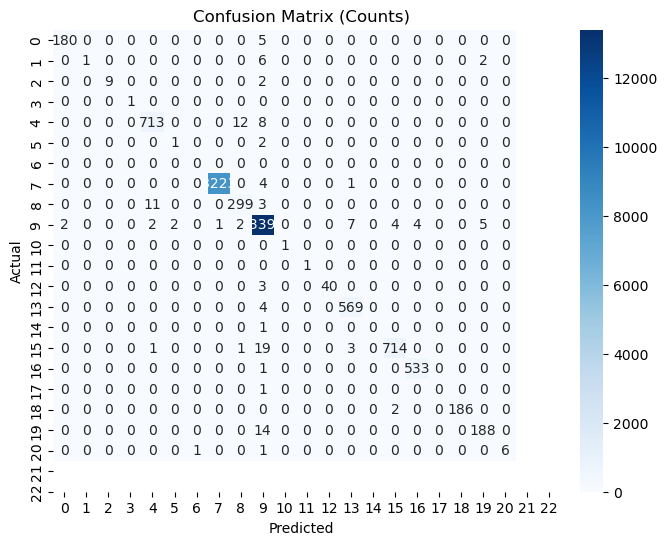

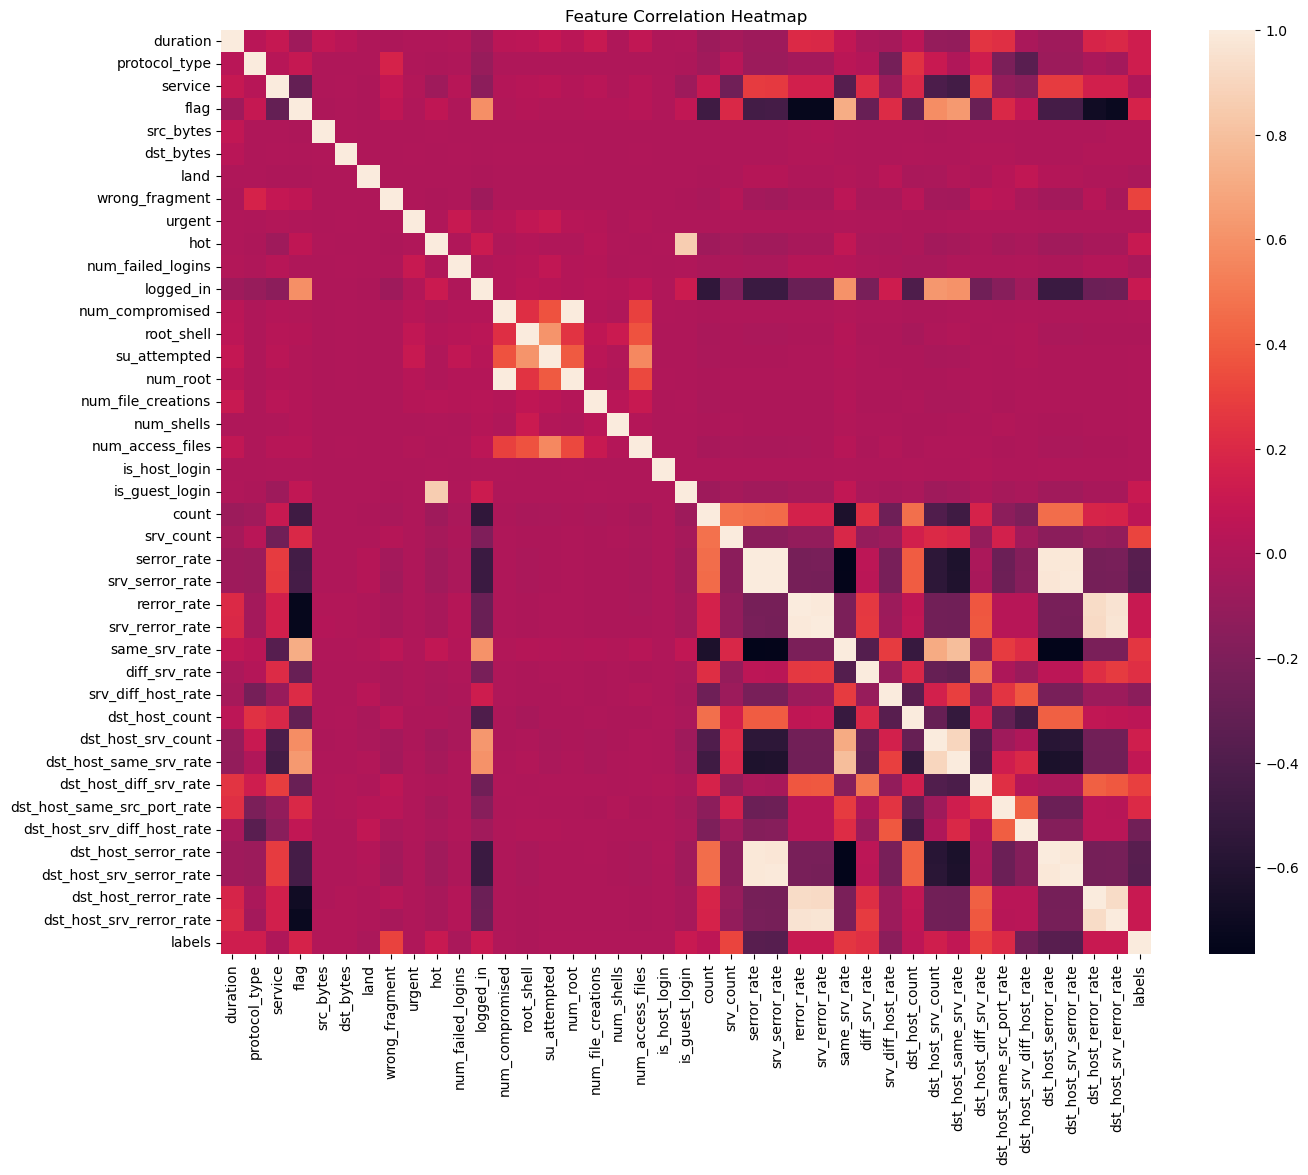

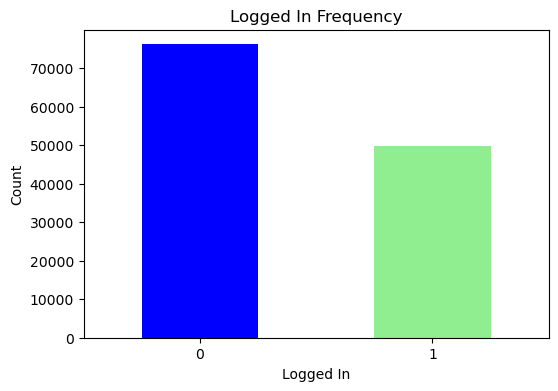

<Figure size 640x480 with 0 Axes>

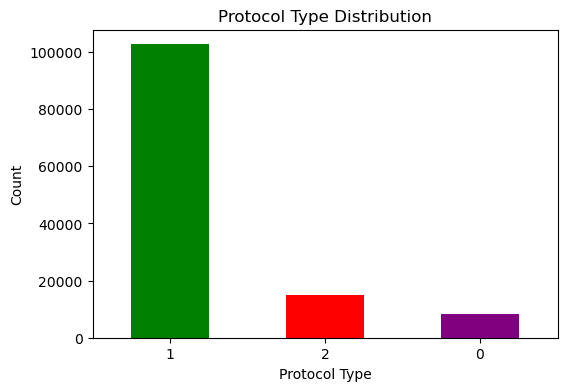

<Figure size 640x480 with 0 Axes>

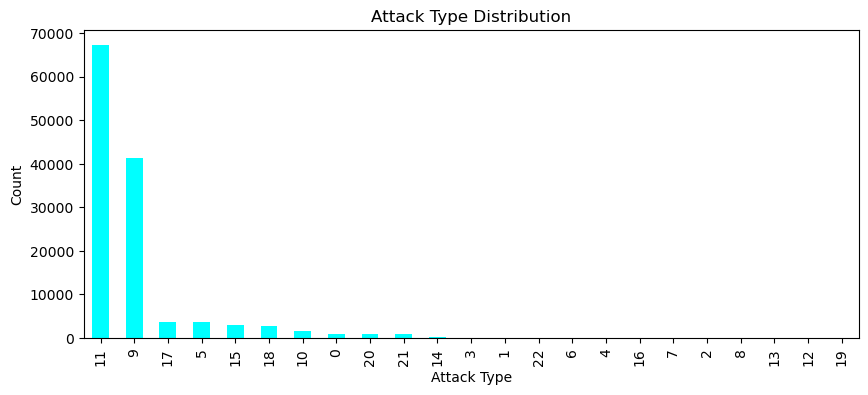

total time 260.55297350883484


<Figure size 640x480 with 0 Axes>

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

full_start=time.time()
# Load dataset
df = pd.read_csv('kdd_train.csv')

# Drop missing values
df = df.dropna()

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Encode categorical columns using Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store label encoders for later use

# Separate features and target
X = df.iloc[:, :-1]  # Assuming last column is the target
y = df.iloc[:, -1]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA (10 components)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#......................................................................................................start DT
# Train Decision Tree
print("DECISION TREE")
start_time = time.time()
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
end_time = time.time()
DT_train=end_time-start_time
print("Training time: ", end_time - start_time)

# Evaluate model
start_time = time.time()
y_pred = dt.predict(X_test)
end_time = time.time()
DT_test=end_time-start_time
print("Testing time: ", end_time - start_time)

# Print train and test scores
DT_ts = round(dt.score(X_train, y_train) * 100, 2)
print(f'Train score is: {dt.score(X_train, y_train) * 100:.2f}%')
print(f'Test score is: {dt.score(X_test, y_test) * 100:.2f}%')
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')
#......................................................................................................end DT

#......................................................................................................start SVM
# Train SVM
print("SUPPORT VECTOR MACHINE")
start_time = time.time()
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
end_time = time.time()
SVM_train=end_time-start_time
print("Training time: ", end_time - start_time)

# Evaluate model
start_time = time.time()
y_pred = svm.predict(X_test)
end_time = time.time()
SVM_test=end_time-start_time
print("Testing time: ", end_time - start_time)

# Print train and test scores
SVM_ts = round(svm.score(X_train, y_train) * 100, 2)
print(f'Train score is: {svm.score(X_train, y_train) * 100:.2f}%')
print(f'Test score is: {svm.score(X_test, y_test) * 100:.2f}%')
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')
#......................................................................................................end SVM

#......................................................................................................start LR
# Train Logistic Regression
print("LOGISTIC REGRESSION")
start_time = time.time()
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
end_time = time.time()
LR_train=end_time-start_time
print("Training time: ", end_time - start_time)

# Evaluate model
start_time = time.time()
y_pred = lr.predict(X_test)
end_time = time.time()
LR_test=end_time-start_time
print("Testing time: ", end_time - start_time)

# Print train and test scores
LR_ts = round(lr.score(X_train, y_train) * 100, 2)
print(f'Train score is: {lr.score(X_train, y_train) * 100:.2f}%')
print(f'Test score is: {lr.score(X_test, y_test) * 100:.2f}%')
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')
#......................................................................................................end LR

#......................................................................................................start GNB
# Train GNB
print("GAUSSION NAIVE BAYES")
start_time = time.time()
rf = GaussianNB()
rf.fit(X_train, y_train)
end_time = time.time()
GNB_train=end_time-start_time
print("Training time: ", end_time-start_time)

# Evaluate model
start_time = time.time()
y_pred = rf.predict(X_test)
end_time = time.time()
GNB_test=end_time-start_time
print("Testing time: ", end_time-start_time)

# Print train and test scores
GNB_ts = round(rf.score(X_train, y_train) * 100, 2)
print(f'Train score is: {rf.score(X_train, y_train) * 100:.2f}%')
print(f'Test score is: {rf.score(X_test, y_test) * 100:.2f}%')
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')
#......................................................................................................end GNB

#......................................................................................................start RF
# Train Random Forest
print("RANDOM FOREST")
start_time = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
end_time = time.time()
Random_forest_train=end_time-start_time
print("Training time: ", end_time-start_time)

# Evaluate model
start_time = time.time()
y_pred = rf.predict(X_test)
end_time = time.time()
Random_forest_test=end_time-start_time
print("Testing time: ", end_time-start_time)

# Print train and test scores
Random_forest_ts = round(rf.score(X_train, y_train) * 100, 2)
print(f'Train score is: {rf.score(X_train, y_train) * 100:.2f}%')
print(f'Test score is: {rf.score(X_test, y_test) * 100:.2f}%')
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')
#......................................................................................................end RF


# Save model, PCA, and label encoders
tools = {'scaler': scaler, 'pca': pca, 'model': rf, 'label_encoders': label_encoders}
joblib.dump(tools, 'intrusion_detection.pkl')

# Visualization - Bar Graph
plt.figure(figsize=(6, 4))
plt.bar(['Accuracy'], [accuracy * 100], color='blue')
plt.ylabel('Percentage')
plt.title('Model Accuracy')
plt.ylim(0, 100)
plt.show()

# Visualization - Heatmaps
conf_matrix = confusion_matrix(y_test, y_pred)
labels = np.unique(y)

# Standard Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Counts)')
plt.show()

# Correlation Heatmap for Numeric Features
df_cleaned = df.dropna(axis='columns')

# Keep numeric columns with more than 1 unique value
ndf = df_cleaned[[col for col in df_cleaned.columns if df_cleaned[col].nunique() > 1 and pd.api.types.is_numeric_dtype(df_cleaned[col])]]

# Compute correlation matrix
corr = ndf.corr()

plt.figure(figsize=(15, 12))
sns.heatmap(corr)
plt.title('Feature Correlation Heatmap')
plt.show()

# Bar Graphs for Logged_in, Protocol Type, Attack Type
plt.figure(figsize=(6, 4))
df['logged_in'].value_counts().plot(kind='bar', color=['blue', 'lightgreen'])
plt.xlabel('Logged In')
plt.ylabel('Count')
plt.title('Logged In Frequency')
plt.xticks(rotation=0)
plt.show()
plt.savefig('static0/loggedin.png')

plt.figure(figsize=(6, 4))
df['protocol_type'].value_counts().plot(kind='bar', color=['green', 'red', 'purple'])
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.title('Protocol Type Distribution')
plt.xticks(rotation=0)
plt.show()
plt.savefig('static0/protocol_type.png')

plt.figure(figsize=(10, 4))
df['labels'].value_counts().plot(kind='bar', color='cyan')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.title('Attack Type Distribution')
plt.xticks(rotation=90)
plt.show()
plt.savefig('static0/labels.png')

import matplotlib.pyplot as plt

# Accuracy Score Distribution
names = ['NB', 'DT', 'RF', 'SVM', 'LR']
values = [GNB_ts,DT_ts,Random_forest_ts,SVM_ts,LR_ts]
#values = [87.951, 99.058, 99.997, 99.875, 99.352]

plt.figure(figsize=(15, 5))
plt.title('Accuracy Score Distribution')
plt.bar(names, values)
plt.savefig('static0/accuracy_analysis.png', dpi=300, bbox_inches='tight')
plt.close()  # Close the figure to avoid overlapping

# Training Time Analysis
values = [GNB_train, DT_train, Random_forest_train, SVM_train, LR_train]

plt.figure(figsize=(15, 5))
plt.title('Training Time Analysis')
plt.bar(names, values)
plt.savefig('static0/training_time_analysis.png', dpi=300, bbox_inches='tight')
plt.close()

# Testing Time Analysis
values = [GNB_test, DT_test, Random_forest_test, SVM_test, LR_test]

plt.figure(figsize=(15, 5))
plt.title('Testing Time Analysis')
plt.bar(names, values)
plt.savefig('static0/testing_time_analysis.png', dpi=300, bbox_inches='tight')
plt.close()


full_end=time.time()
print("total time",full_end-full_start)